In [ ]:
#Bidirectional LSTM for streamflow problem with window regression framing
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from keras.layers import Bidirectional,GRU, SimpleRNN
from keras.layers import BatchNormalization, Dropout
from keras.layers import Activation

In [ ]:
RNN_Method = "/content/gdrive/My Drive/Colab Notebooks/E1"
Var_LRs=[1e-3] #,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9] #
Var_Decays=[1e-2] #,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9]
Var_epochs=[500]
Method="ANN"
from google.colab import drive 
drive.mount('/content/gdrive')

Streamflow = pd.read_csv('/content/gdrive/My Drive/Ermenek.csv', skiprows=1, names = ["SFt-1", "SFt-2", "SFt-3", "SFt-4", "SFt-5", "SFt-6", "SFt-7","SFt"])

#Streamflow = pd.read_csv('Monthly.csv', names = ["SFt", "Pt", "SSH", "Tmean", "Pmean", "Rhmean", "Month"])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
x= Streamflow.drop('SFt',axis=1)
Y= Streamflow['SFt']

In [ ]:
X=np.array(x)
y=np.array(Y)

In [ ]:
train_size_y = int(len(y) * 0.70)
train_size_X = int(len(X) * 0.70)
y_train, y_test = y[0:train_size_y], y[train_size_y:len(y)]
X_train, X_test = X[0:train_size_X], X[train_size_X:len(X)]

In [ ]:
#train_size_y = int(len(y) * 0.70)
#train_size_X = int(len(X) * 0.70)
#y_train, y_test = y[0:train_size_y], y[train_size_y:len(y)]
#X_train, X_test = X[0:train_size_X], X[train_size_X:len(X)]
#HA_Speed_Up print(X_train.shape)

In [ ]:
# reshape input to be [samples, time steps, features]
# ANN için alt2 kapalı, RNN için aç
#X_train = numpy.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
#X_test = numpy.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape)
print(X_test.shape)

(1400, 7)
(600, 7)


In [ ]:
input=X_train[1:]
input_shape=X_train.shape[1:]
#HA_Speed_Up print(input_shape)

In [ ]:
from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as geek

In [ ]:
startTime = datetime.now()
#fileOfSummary = open(RNN_Method+'_Summary_'+str(datetime.now()).replace(":", ".")+'.csv', "w")
#fileOfSummary.write("Method,LR,DE,Epoch,RunTime,CCTr,CCTt,NSTr,NSTt,RMSETr,RMSETt,MAETr,MAETt,MAPETr,MAPETt\n")

In [ ]:
for e_LR in Var_LRs:
    for e_decay in Var_Decays:

        for e_epoch in Var_epochs:
            
            def create_LSTM():
                '''
                model = Sequential()
                #https://keras.io/layers/recurrent/#simplernn
                #model.add(SimpleRNN(200, input_shape=X_train.shape[1:], activation='relu',return_sequences=True))
                model.add(Bidirectional(LSTM(200, input_shape=X_train.shape[1:], activation='relu',return_sequences=True)))
                model.add(Dropout(0.1))
                #model.add(BatchNormalization())
                model.add(Bidirectional(LSTM(150, activation='relu')))
                #model.add(SimpleRNN(150, activation='relu'))

                model.add(Dropout(0.10))
                #model.add(BatchNormalization())

                model.add(Dense(100, activation='relu'))
                model.add(Dropout(0.10))

                model.add(Dense(1, activation='relu'))
                '''
                model = Sequential()
                model.add(Dense(units=200, input_shape=X_train.shape[1:]))
                #model.add(BatchNormalization())
                model.add(Activation(activation='relu'))
                model.add(Dropout(0.1))
 
                model.add(Dense(100, activation='relu'))
                #model.add(BatchNormalization())
                #model.add(Dropout(0.1))
                
                model.add(Dense(1, activation='relu'))

                return model
                #https://stackoverflow.com/questions/42763094/how-to-save-final-model-using-keras
            model = create_LSTM()
            
            optimizer = keras.optimizers.adam(lr=e_LR, decay=e_decay)
            model.compile(optimizer=optimizer,loss='mean_squared_error')
        
            print(" ")
            print(" ")
            print("LRs:",e_LR)
            print("Decays:",e_decay)
            print("epochs:",e_epoch)
            history = model.fit(X_train, y_train, epochs=e_epoch, batch_size=256, verbose=0, validation_data=(X_test, y_test))

            hist_df = pd.DataFrame(history.history) 
            Time_elasped= datetime.now() - startTime
            print('\nTime elasped: ', Time_elasped)

            Train = model.predict(X_train)
            Test = model.predict(X_test)

            FileName=RNN_Method+'-LR'+str(e_LR)+'-DE'+str(e_decay)+'-'+str(e_epoch)
            #np.savetxt(FileName+'_Train.csv', Train)
            #np.savetxt(FileName+'_Test.csv', Test)
            #with open(FileName+'_History.csv', mode='w') as f:
            #    hist_df.to_csv(f)
    
            #model.save(FileName+'_Model.h5')
            #Train = np.loadtxt(FileName+'_Train.csv')
            #Test = np.loadtxt(FileName+'_Test.csv')
            Train = geek.asarray(Train)# np.loadtxt(FileName+'_Train.csv')
            Test = geek.asarray(Test)
            Train = Train.reshape(Train.shape[0])
            Test = Test.reshape(Test.shape[0])

            print(" ")
            print("LRs:",e_LR)
            print("Decays:",e_decay)
            print("epochs:",e_epoch)
            print("Train ==>")
            CC_Train=np.corrcoef(y_train,Train)
            print("CC_Train = %.3f" %CC_Train[0,1])

            NSTr=1 - sum((Train-y_train)**2)/sum((y_train-np.mean(y_train))**2)
            print("NSTr = %.2f" %NSTr)

            rootMeanSquaredErrorTr = sqrt(mean_squared_error(y_train, Train))
            print("RMSE = %.2f" % rootMeanSquaredErrorTr)
            MAETr=mean_absolute_error(y_train, Train)
            print("MAE = %.2f" %  MAETr)

            MAPETr=np.mean(np.abs((y_train - Train) / y_train)) * 100
            print("MAPE = %.2f" %MAPETr)

            print("Test ==>")
            CC_Test=np.corrcoef(y_test,Test)
            print("CC_Test = %.3f" %CC_Test[0,1])

            NSTt=1 - sum((Test-y_test)**2)/sum((y_test-np.mean(y_test))**2)
            print("NSTt = %.2f" %NSTt)

            rootMeanSquaredErrorTt = sqrt(mean_squared_error(y_test, Test))
            print("RMSE = %.2f" % rootMeanSquaredErrorTt)
            MAETt=mean_absolute_error(y_test, Test)
            print("MAE = %.2f" %  MAETt)

            MAPETt=np.mean(np.abs((y_test - Test) / y_test)) * 100
            print("MAPE = %.2f" %MAPETt)
            #fileOfSummary.write(RNN_Method+','+str(e_LR)+','+str(e_decay)+','+str(e_epoch)+','+str(Time_elasped)+','+str(CC_Train[0,1])+','+str(CC_Test[0,1])+','+str(NSTr)+','+str(NSTt)+','+str(rootMeanSquaredErrorTr)+','+str(rootMeanSquaredErrorTt)+','+str(MAETr)+','+str(MAETt)+','+str(MAPETr)+','+str(MAPETt)+'\n')
            del model
            

 
 
LRs: 0.001
Decays: 0.01
epochs: 500

Time elasped:  0:00:11.540835
 
LRs: 0.001
Decays: 0.01
epochs: 500
Train ==>
CC_Train = 0.871
NSTr = 0.76
RMSE = 20.15
MAE = 10.10
MAPE = 90.06
Test ==>
CC_Test = 0.850
NSTt = 0.72
RMSE = 18.66
MAE = 10.27
MAPE = 89.23


In [ ]:
#fileOfSummary.close()
print("Summary file is written")
print("Finished")

Summary file is written
Finished


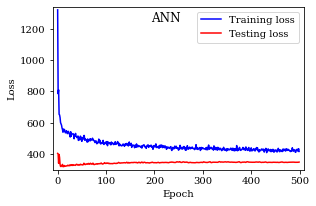

In [ ]:
plt.figure(figsize=(4.5, 3))
plt.rcParams["font.size"] =10
#plt.rcParams["font.family"] = {'serif'}
plt.plot(history.history['loss'],'b' ,label="Training loss")
plt.plot(history.history['val_loss'],'r', label="Testing loss")
#plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.legend()
plt.margins(0.02,0.02)
plt.title(Method, position=(0.45, .87))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(RNN_Method+"/"+Method+"-"+str(datetime.now()).replace(":", ".")+".png")

In [ ]:
plt.rcParams["font.family"] = ['Tahoma', 'Lucida Grande', 'Verdana']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

plt.rcParams["font.family"] = {'serif'}
#plt.rcParams['font.sans-serif'] = ['Tahoma', 'Lucida Grande', 'Verdana']
plt.figure(figsize=(5, 3))
plt.rcParams["font.size"] =10
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.plot(y_train,'b',label='Train obs')
plt.plot(Train,'r',label='Train pred')
plt.plot([None for i in y_train] + [x for x in y_test],label='Test obs')
plt.plot([None for i in Train] + [x for x in Test],label='Test pred')
plt.xlabel('Time (Day)')
plt.ylabel('Streamflow (m³/s)')
plt.title(Method, position=(0.5, .87))
plt.margins(0.02,0.03)
plt.legend()

plt.savefig(RNN_Method+"/"+Method+"-"+str(datetime.now()).replace(":", ".")+".png")

In [ ]:
print (Test.shape)
#print (Test)
#fig.savefig(RNN_Method+"/"+Method+"-"+str(datetime.now()).replace(":", ".")+".png", dpi=150)
print(RNN_Method+"/"+Method+"-"+str(datetime.now()).replace(":", ".")+".png")


(600,)
/content/gdrive/My Drive/Colab Notebooks/E1/ANN-2020-05-18 14.14.41.763509.png
